# Problem Set #4

MACS 30000, Dr. Evans

Haihao Guo

## Exercise 1

#### A

In [1]:
import numpy as np
import scipy.stats as sts
import requests

In [2]:
income = np.loadtxt('data/incomes.txt')

<IPython.core.display.Javascript object>


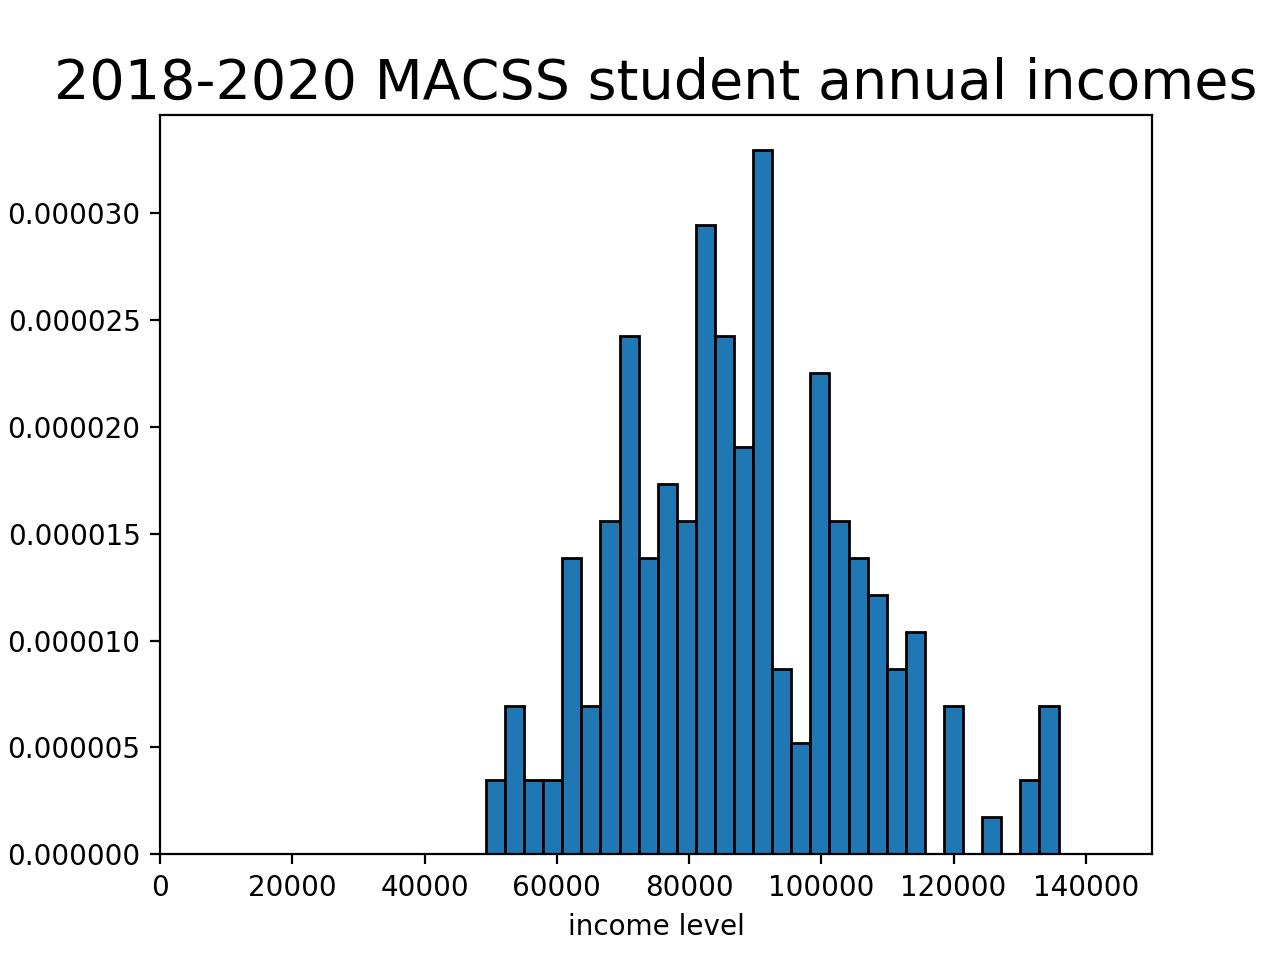

Text(0,0.5,'Percent of incomes')

In [5]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, edgecolor='k', density=True)
plt.title('2018-2020 MACSS student annual incomes', fontsize=20)
plt.xlim([0, 150000])
plt.xlabel(r'income level')
plt.ylabel('Percent of incomes')
#plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

#### B

<IPython.core.display.Javascript object>


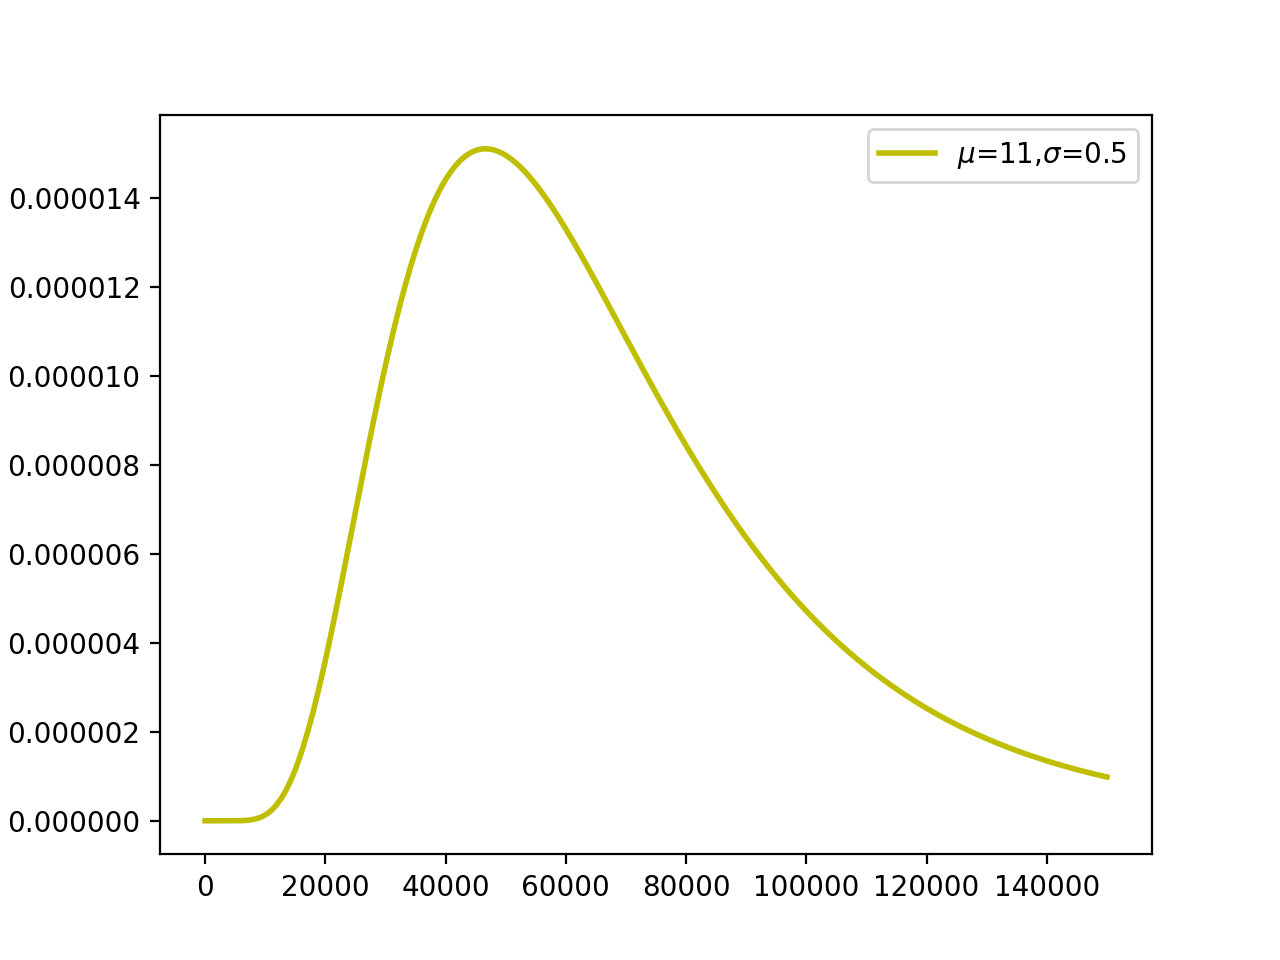

Log-likelihood:  -2385.856997808558


In [44]:
def log_lik_norm(xvals, mu, sigma):
    
    pdf_vals = sts.lognorm.pdf(xvals, scale=np.exp(mu), s=sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

mu = 11
sigma = 0.5
xval = np.linspace(1e-9, 150000, 200000)

plt.plot(dist_pts, log_normal_pdf(xval, mu, sigma),
         linewidth=2, color='y', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')

print('Log-likelihood: ', log_lik_norm(income, mu, sigma))

#### C

In [48]:
def crit(params, *args):

    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_norm(xvals, mu, abs(sigma))
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [53]:
import scipy.optimize as opt

mu_init = 11  # mu_2
sig_init = 0.5  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = income
results_uncstr = opt.minimize(crit, params_init, args=mle_args)
mu_MLE, sig_MLE = results_uncstr.x
Hess = results_uncstr.hess_inv
fval = -results_uncstr.fun

num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, edgecolor='k', density=True)
plt.title('2018-2020 MACSS student annual incomes', fontsize=20)
plt.xlim([0, 150000])
plt.xlabel(r'income level')
plt.ylabel('Percent of incomes')
print('the ML estimates for μ and σ is {:.2f} and {:.2f}'.format(mu_MLE, sig_MLE))
print('The value of the likelihood function is ', fval)
print('The variance-covariance matrix is\n ', Hess)

the ML estimates for μ and σ is 11.36 and 0.21
The value of the likelihood function is  -2241.7193013573587
The variance-covariance matrix is
  [[1.12331589e-04 5.23389235e-05]
 [5.23389235e-05 1.81933048e-04]]


<IPython.core.display.Javascript object>


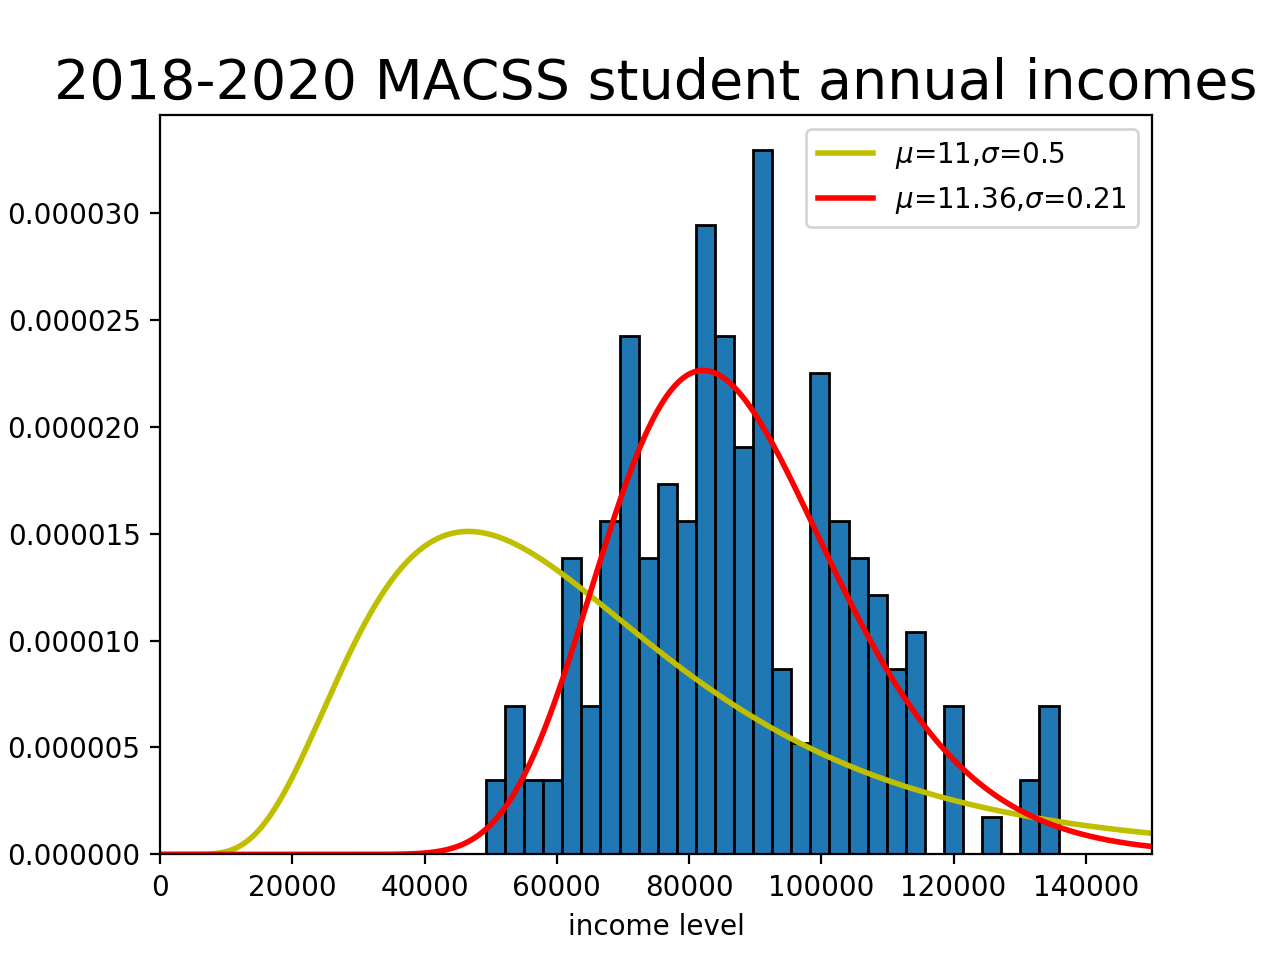

In [56]:
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, edgecolor='k', density=True)
plt.title('2018-2020 MACSS student annual incomes', fontsize=20)
plt.xlim([0, 150000])
plt.xlabel(r'income level')
plt.ylabel('Percent of incomes')

mu = 11
sigma = 0.5
xval = np.linspace(1e-9, 150000, 200000)

plt.plot(dist_pts, log_normal_pdf(xval, mu, sigma),
         linewidth=2, color='y', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')

mu_ = 11.36
sigma_ = 0.21
plt.plot(dist_pts, log_normal_pdf(xval, mu_, sigma_),
         linewidth=2, color='r', label='$\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper right')

#### D

In [58]:
mu_new, sig_new = np.array([11, 0.5])
print(mu_new, sig_new)
print(mu_MLE, sig_MLE)
log_lik_h0 = log_lik_norm(income, mu_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_norm(income, mu_MLE, sig_MLE)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

11.0 0.5
11.359022996953069 0.20817731947715873
hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.7193013573587
likelihood ratio value 288.2753929023984
chi squared of H0 with 2 degrees of freedom p-value =  0.0


We could reject the null hypothesis that $\mu = 11$ and $\sigma =0.5$.

#### E

In [61]:
prob1 = 1 - sts.lognorm.cdf(100000, s=sig_MLE, scale=np.exp(mu_MLE))
prob2 = sts.lognorm.cdf(75000, s=sig_MLE, scale=np.exp(mu_MLE))
print('Probability I would earn more than $100,000 is {:.3f}'.format(prob1))
print('Probability I would earn less than $75,000 is {:.3f}'.format(prob2))

Probability I would earn more than $100,000 is 0.230
Probability I would earn less than $75,000 is 0.260


## Exercise 2

#### A

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt

In [2]:
df = pd.read_csv("data/sick.txt").astype('float64')
y, x1, x2, x3 = df['sick'], df['age'], df['children'], df['avgtemp_winter']

def log_lik(y, x1, x2, x3, beta_0,
            beta_1, beta_2, beta_3, sigma):
    epsilon = y - beta_0 - beta_1 * x1 - beta_2 * x2 - beta_3 * x3
    pdf_vals = sts.norm.pdf(epsilon, loc=0.0, scale=sigma)
    log_lik_func = np.log(pdf_vals).sum()
    
    return log_lik_func

def crit_lr(params, *args):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    y, x1, x2, x3 = args
    neg_log_lik = -log_lik(y, x1, x2, x3, beta_0,
                           beta_1, beta_2, beta_3, sigma)
    
    return neg_log_lik

beta_0_init = 0.2
beta_1_init = 0
beta_2_init = 0
beta_3_init = 0
sigma_init = 1
params_init = np.array([beta_0_init, beta_1_init,
                        beta_2_init, beta_3_init, sigma_init])
args_lr = (y, x1, x2, x3)
results = opt.minimize(crit_lr, params_init, args=(args_lr))

/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [5]:
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x
print('beta 0: {}'.format(b0_MLE))
print('beta 1: {}'.format(b1_MLE))
print('beta 2: {}'.format(b2_MLE))
print('beta 3: {}'.format(b3_MLE))
print('sigma: {}'.format(sig_MLE))
print("value of the log likelihood function: {}".format(-results.fun))
print("variance-covariance matrix: \n {}".format(results.hess_inv))

beta 0: 0.2516468212714749
beta 1: 0.012933511093896677
beta 2: 0.4005000605788476
beta 3: -0.009991762652022344
sigma: 0.0030178153048468596
value of the log likelihood function: 876.8650541185124
variance-covariance matrix: 
 [[ 9.20304887e-07  7.74904488e-09 -1.56022225e-07 -2.13021993e-08
   2.41476352e-09]
 [ 7.74904488e-09  4.23400822e-09 -3.75839406e-08 -2.65786461e-09
  -1.12791601e-10]
 [-1.56022225e-07 -3.75839406e-08  3.82573399e-07  2.37261658e-08
   8.51260514e-10]
 [-2.13021993e-08 -2.65786461e-09  2.37261658e-08  2.04143342e-09
   3.58410778e-11]
 [ 2.41476352e-09 -1.12791601e-10  8.51260514e-10  3.58410778e-11
   2.43816402e-08]]


#### B

In [80]:
b0_new, b1_new, b2_new, b3_new, sig_new = np.array([1, 0, 0, 0, 0.1])
print(b0_new, b1_new, b2_new, b3_new, sig_new)
print(b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
log_lik_h0 = log_lik(y, x1, x2, x3, b0_new, b1_new, b2_new, b3_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik(y, x1, x2, x3, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

1.0 0.0 0.0 0.0 0.1
0.2516468212714749 0.012933511093896677 0.4005000605788476 -0.009991762652022344 0.0030178153048468596
hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650541185124
likelihood ratio value 6261.131484321275
chi squared of H0 with 2 degrees of freedom p-value =  0.0


The likelihood that age, number of children, and average winter temperature have no effect on the number of sick days is 0.